# Ejercicios regresion logistica usando con sklearn

---



#Regresión logsitica con dataset  local 
---
dataset con la cantidad de horas de estudio para un examen vs el resultado (aprobado/reprobado)
https://github.com/luisFernandoCastellanosG/Machine_learning/blob/master/Databaset_para_trabajar_sklearn/horas_estudio_vs_aprobacion.csv





##P1.Cargando Librerías necesarias

In [1]:
import numpy as np              #Mejora el soporte para vectores y matrices
import pandas as pd             #Estructura de datos (Ciencia de datos)

import matplotlib.pyplot as plt #Para graficar
import seaborn as sns           #interfaz de alto nivel para dibujar gráficos estadísticos (basada en matplotlib)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##P2. Conectarse a google drive y cargar el CSV con el dataset

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Cargar el dataset en un dataframe de pandas

In [2]:
df = pd.DataFrame()
df = pd.read_csv('/content/gdrive/My Drive/IA/Databaset_para_trabajar_sklearn/horas_estudio_vs_aprobacion.csv', encoding='utf-8')

##P3.Conociendo los datos que tiene el dataset

In [5]:
#primeros 5 regirstros del dataframe
#df.head(10)
#dimensiones del dataframe
df.shape

(2000, 2)

hay datos nulos?

In [6]:
df.isnull().sum()

horas      0
aprueba    0
dtype: int64

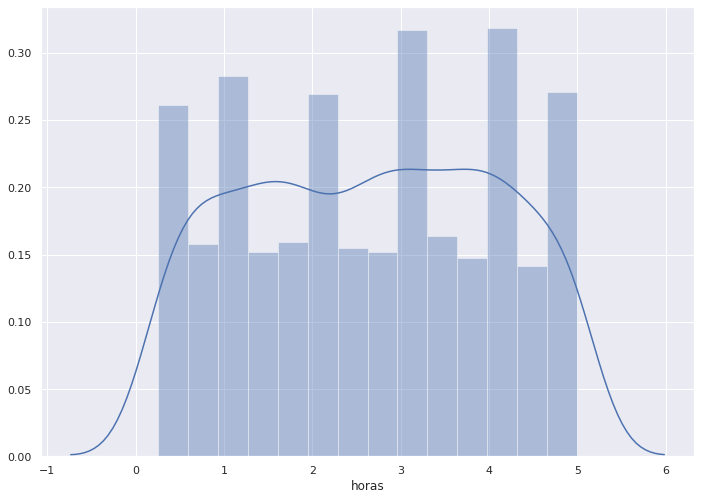

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})  #tamaño del grafico
sns.distplot(df['horas'])                #agregamos los datos
plt.show()    

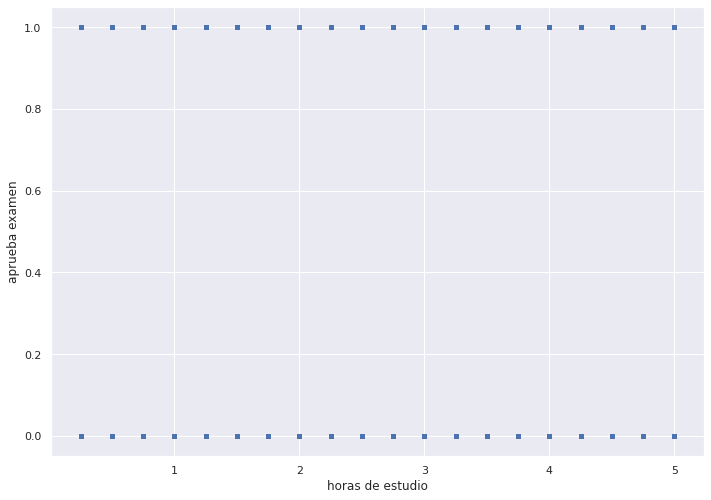

In [10]:
X = df['horas']
y = df['aprueba']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('horas de estudio')
plt.ylabel('aprueba examen')
plt.show()

## P4.Separando los datos para el entrenamiento


In [12]:
#En X colocaremos el tiempo de estudio que tomaron los estudiantes antes del examen
#apilamos los datos que vienen en 1d a 2d  
#opcion 1: usamos np.c_
#X = pd.DataFrame(np.c_[df['horas']], columns = ['horas'])
#opcion2: usamos .reshape(-1, 1)
X = np.array(df['horas']).reshape(-1, 1)
#En Y colocaremos el resultado del examen (1 / 0 ) (aprobado / reprobado)
y= np.array(df['aprueba'])
print(X)

[[0.5 ]
 [2.  ]
 [0.75]
 ...
 [2.75]
 [4.75]
 [4.  ]]


##P5. importamos la clase LogisticRegresion de scikit-learn

In [13]:
#clase de regresión logistica disponsible en sklearn
from sklearn.linear_model import LogisticRegression
#Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()

##P6. Entrena la regresión logística con los datos de entrenamiento


In [14]:
#entrenando modelo de regresión logistica
regresion_logistica.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##P7.Haciendo predicciones
Tomaremos una grupo de horas y miraremos que probabilidad de pasar el examen tenemos

In [15]:
#definimos que pasa si el estudiante estudia entre 1 a 6 horas
X_nuevo = np.array([1, 2, 3, 4, 5, 6]).reshape(-1,1)
#ejecutamos la predicción
prediccion = regresion_logistica.predict(X_nuevo)
print(prediccion)

[0 0 0 1 1 1]


##P8. Generando probabilidades de la predicción

In [16]:
probabilidades_prediccion = regresion_logistica.predict_proba(X_nuevo)
#la primera columna es la probabilidad de reprobar (0)
#la segunda columna es  la probabilidad de aprobar (1)
print(probabilidades_prediccion)
#si solo nos interesa la probabilidad de aprobar
print(probabilidades_prediccion[:,1])

[[0.5112111  0.4887889 ]
 [0.50683522 0.49316478]
 [0.50245829 0.49754171]
 [0.49808099 0.50191901]
 [0.49370398 0.50629602]
 [0.48932793 0.51067207]]
[0.4887889  0.49316478 0.49754171 0.50191901 0.50629602 0.51067207]


#El Mismo estudio pero teniendo en cuenta horas de tutorias

---

Vuelven a hacer otro estudio y adicionan las horas de tutoría que toma cada estudiante en el mes, con ello quieren predecir que probabilidades tiene de pasar el examen

##P1.Cargando Librerías necesarias

In [17]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

##P2. Conectarse a google drive y cargar el CSV con el dataset

In [1]:
#si ya tiene habilitado la carpeta de gdrive no ejecute este código
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [31]:
df = pd.DataFrame()
#df = pd.read_csv('/content/gdrive/My Drive/IA/Databaset_para_trabajar_sklearn/horas_estudio_tutorias_vs_aprobacion.csv', encoding='utf-8')
df = pd.read_csv('/content/gdrive/My Drive/IA/Databaset_para_trabajar_sklearn/mercadeo_bancario.csv', encoding='utf-8')

##P3. Conociendo los datos

In [32]:
#primeros 5 registros del dataframe
df.head(20)

edad      trabajo estado_civil   ... anterior_contacto  numero_empleados si_no
0     44  blue-collar       married  ...                 0                88     0
1     53   technician       married  ...                 0                14     0
2     28   management        single  ...                 2              1993     1
3     39     services       married  ...                 0              1338     0
4     55      retired       married  ...                 1              1184     1
5     30   management      divorced  ...                 0              1553     0
6     37  blue-collar       married  ...                 0               442     0
7     39  blue-collar      divorced  ...                 0               495     0
8     36       admin.       married  ...                 1              1097     1
9     27  blue-collar        single  ...                 1               414     0
10    34    housemaid        single  ...                 0              1600     0
11    41   management       married  ...                 0              1630     0
12    55   management       married  ...                 0              1515     1
13    33     services      divorced  ...                 0               388     0
14    26       admin.       married  ...                 0               858     0
15    52     services       married  ...                 0              1342     0
16    35     services       married  ...                 0              1880     1
17    27       admin.        single  ...                 0              1972     1
18    28  blue-collar       married  ...                 0               308     0
19    26   unemployed        single  ...                 0               286     0

[20 rows x 18 columns]

In [33]:
#dimensiones del dataframe
print("matrix df [MxN] ->"+str(df.shape))
#verificamos que no hayan nulos
print("---Columnas con valores nulos--")
print(df.isnull().sum())

matrix df [MxN] ->(41188, 18)
---Columnas con valores nulos--
edad                        0
trabajo                     0
estado_civil                0
educacion                   0
total_hijos                 0
credito_sin_pago            0
prestamo_vivienda           0
prestamo_personal           0
valor_prestamo              0
tarjetas_credito            0
contacto                    0
mes                         0
dia_semana                  0
duracion_ultimo_contacto    0
dias_ultimo_contacto        0
anterior_contacto           0
numero_empleados            0
si_no                       0
dtype: int64


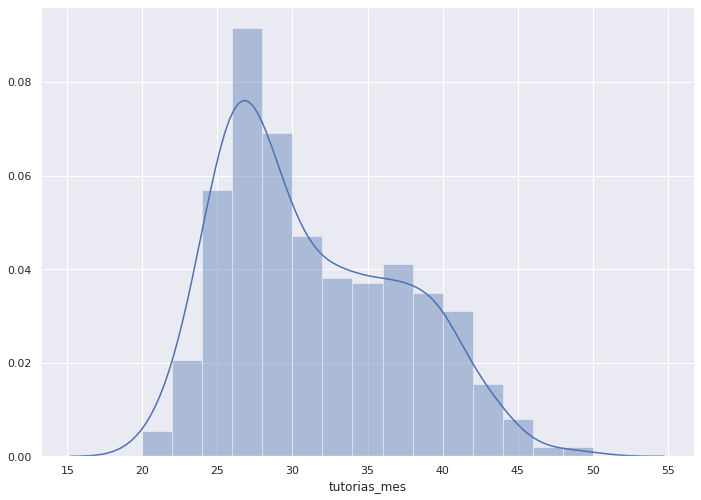

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})  #tamaño del grafico
sns.distplot(df['tutorias_mes'])                #agregamos los datos
plt.show()    

##P4.Separando los datos para el entrenamiento

---

separaremos las características y etiquetamos como **X** e **Y** respectivamente. 


*   la variable X (horas_autoestudio_diario +	tutorias_mes)
*   la varible Y (aprobo_perdio)

In [22]:
x = df.drop('aprobo_perdio',axis = 1)
y = df.aprobo_perdio

Dividiremos los datos en conjuntos de **train** y **test**. Esto separará 25%(! valor predeterminado) de los datos en un subconjunto para la parte de prueba y el 75% restante se usará para nuestro subconjunto de entrenamiento.

In [23]:
#separamos los datos 25%(test) y 75%(train)
#x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)
#Si deseamos cambiar la proporción solo debemos agregar la variable test_size=0.x 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4,test_size=0.2)

##P5. importamos la clase LogisticRegresion de scikit-learn

In [24]:
#Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()

##P6. Entrena la regresión logística con los datos de entrenamiento

In [26]:
#entrenando modelo de regresión logistica
regresion_logistica.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##P7.Haciendo predicciones

In [27]:
#usaremos el 20% de los datos para probar el modelo
#ejecutamos la predicción con datos de prueba (x_test)
y_prediccion = regresion_logistica.predict(x_test)

##P8. Generando probabilidades de la predicción

In [28]:
#comparamos los datos de predicción (y_prediccion) VS los datos de prueba (y_test)
exactitud = metrics.accuracy_score(y_test, y_prediccion)
print("exactitud_percentaje= "+str(100 * exactitud))

exactitud_percentaje= 97.0


probemos con datos manuales para probar el modelo

In [30]:
#hagamos prediccion con datos manuales: 
#              [horas_estudio , horas_tutoria]
#1-estudiante: [ 4            , 38 ]
#2-estudiante: [ 8            , 29 ]
#3-estudiante: [ 1            , 1  ]
alumnos=np.array([[4, 38], [8, 29],[1.5,2],[10.75,2.5]])
x_nuevo = pd.DataFrame(alumnos,columns = ['horas_autoestudio_diario','tutorias_mes'])
y_prediccion = regresion_logistica.predict(x_nuevo)
print(y_prediccion)

[0 1 1 1]
